C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.



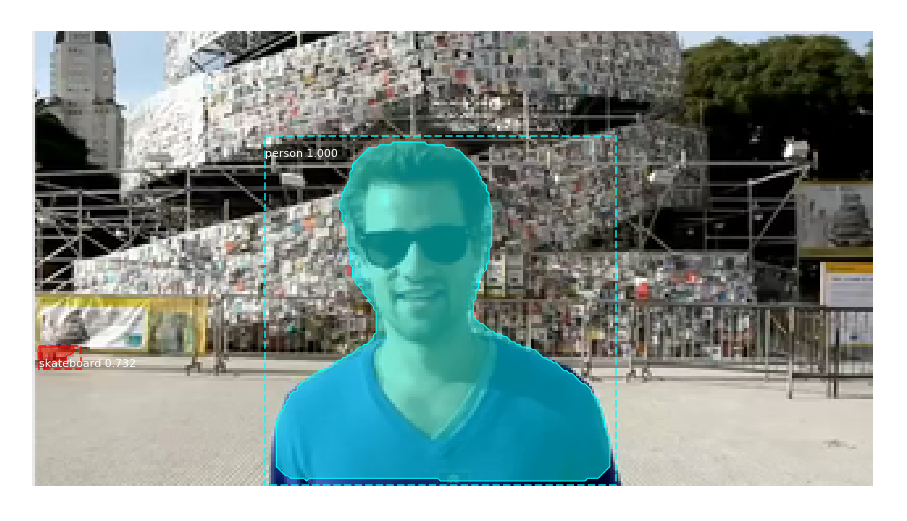

In [1]:
#darame로부터 전경 사진을 전달받아 Mask_RCNN으로 segmentation하여 display

from mrcnn.config import Config
from mrcnn import model as modellib
import mrcnn
import numpy as np
import colorsys
import argparse
import imutils
import random
import cv2
import os
import glob
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.visualize import display_instances
%matplotlib inline



def load_foreground(foreground_path):
    try:
        foreground= glob.glob(foreground_path+'/*.jpg')[0]
    except:
        foreground= glob.glob(foreground_path+'/*.png')[0]

    foreground = load_img(foreground)

    return foreground

def do_MRCNN(model_path, foreground_path , config , class_names):
    
    foreground = load_foreground(foreground_path)

    model = modellib.MaskRCNN(mode="inference", config=config, model_dir=model_path)

    model.load_weights('mask_rcnn_coco.h5', by_name=True)

    foreground_ = img_to_array(foreground)
    
    results = model.detect([foreground_], verbose=0) 
    
    r = results[0]
    
    display_instances(foreground_, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'], ax=pyplot.figure(figsize=(16,16)).add_subplot(111))
    
    pyplot.savefig('output/display_maskes.png', bbox_inches='tight')
    
    return r


def main():
    model_path='C:/Users/user/anaconda3/Lib/site-packages/Mask_RCNN'
    foreground_path='img/foreground'    

    class myMaskRCNNConfig(Config):
        # give the configuration a recognizable name
        NAME = "MaskRCNN_inference"
 
        # set the number of GPUs to use along with the number of images
        # per GPU
        GPU_COUNT = 1
        IMAGES_PER_GPU = 1
 
        # number of classes (we would normally add +1 for the background
        # but the background class is *already* included in the class
        # names)
        NUM_CLASSES = 1+80
    
    class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
     'bus', 'train', 'truck', 'boat', 'traffic light',
     'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
     'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
     'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
     'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
     'kite', 'baseball bat', 'baseball glove', 'skateboard',
     'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
     'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
     'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
     'donut','cake', 'chair', 'couch', 'potted plant', 'bed',
     'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
     'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
     'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
     'teddy bear', 'hair drier', 'toothbrush']
    
    config = myMaskRCNNConfig() 
    
    result = do_MRCNN(model_path, foreground_path, config, class_names)

    np.savez('result.npz', rois=result['rois'], masks=result['masks'], classId=result['class_ids'])
    
if __name__== "__main__":
    main()